In [1]:
# Imports
import os
import sys
import tensorflow as tf

from InceptionModel.inception_utils import load_model, load_labels_vocabulary, make_predictions_and_gradients, top_label_id_and_score
from IntegratedGradients.integrated_gradients import integrated_gradients, random_baseline_integrated_gradients
from VisualizationLibrary.visualization_lib import Visualize, show_pil_image, pil_image


//anaconda/envs/test-DL-1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
MODEL_LOC='./InceptionModel/tensorflow_inception_graph.pb'
LABELS_LOC='./InceptionModel/imagenet_comp_graph_label_strings.txt'

# Load the Inception model.
sess, graph = load_model(MODEL_LOC)

# Load the Labels vocabulary.
labels = load_labels_vocabulary(LABELS_LOC)

# Make the predictions_and_gradients function
inception_predictions_and_gradients = make_predictions_and_gradients(sess, graph)

In [3]:
image = tf.image.decode_jpeg(tf.read_file("/Users/pin-jutien/Integrated-Gradients/Images/70bfca4555cca92e.jpg"), 
                             channels=3)
# sess = tf.InteractiveSession()
img = sess.run(image)
img[:2]

array([[[154, 169, 190],
        [154, 169, 190],
        [154, 169, 190],
        ...,
        [156, 170, 197],
        [169, 183, 212],
        [159, 173, 202]],

       [[154, 169, 190],
        [154, 169, 190],
        [154, 169, 190],
        ...,
        [156, 170, 197],
        [163, 177, 204],
        [155, 169, 196]]], dtype=uint8)

In [4]:
def load_image(img_path):
    # "/Users/pin-jutien/Integrated-Gradients/Images/70bfca4555cca92e.jpg"
    image = tf.image.decode_jpeg(tf.read_file(img_path), channels=3)
    img = sess.run(image)
    return img

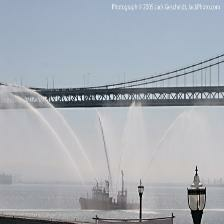

In [5]:
img = load_image("/Users/pin-jutien/Integrated-Gradients/Images/70bfca4555cca92e.jpg")
pil_image(img)

In [6]:
"""
# Load the image.
def load_image(img_path):
  with open(img_path) as f:
    img = f.read()
    img = sess.run(tf.image.decode_jpeg(img))
    return img

img = load_image('./Images/70bfca4555cca92e.jpg')
show_pil_image(pil_image(img))
"""

"\n# Load the image.\ndef load_image(img_path):\n  with open(img_path) as f:\n    img = f.read()\n    img = sess.run(tf.image.decode_jpeg(img))\n    return img\n\nimg = load_image('./Images/70bfca4555cca92e.jpg')\nshow_pil_image(pil_image(img))\n"

Top label: fireboat, score: 0.999985
Gradients


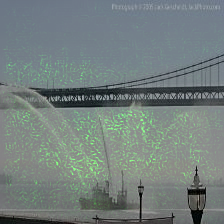

In [7]:
# Determine top label and score.
top_label_id, score = top_label_id_and_score(img, inception_predictions_and_gradients)
print("Top label: %s, score: %f" % (labels[top_label_id], score))

# Compute attributions based on just the gradients.
_, gradients = inception_predictions_and_gradients([img], top_label_id)

print('Gradients')
# show_pil_image(pil_image(Visualize(
#     gradients[0], img,
#     clip_above_percentile=99,
#     clip_below_percentile=0,
#     overlay=True)))
pil_image(Visualize(
    gradients[0], img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True))


### path_type = 0

Integrated Gradients


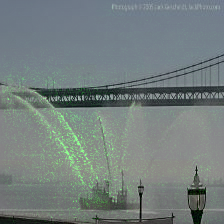

In [8]:
# Compute attributions based on the integrated gradients method.
attributions = random_baseline_integrated_gradients(
    img,
    top_label_id,
    inception_predictions_and_gradients,
    steps=50,
    num_random_trials=10,
    path_type = 0
)

print('Integrated Gradients')
# show_pil_image(pil_image(Visualize(
#     attributions, img,
#     clip_above_percentile=99,
#     clip_below_percentile=0,
#     overlay=True)))
pil_image(Visualize(
    attributions, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True))

### path_type = 1

path type: 1
path type: 1
path type: 1
path type: 1
path type: 1
path type: 1
path type: 1
path type: 1
path type: 1
path type: 1
Integrated Gradients


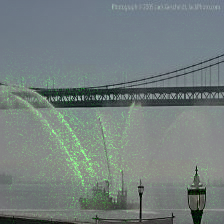

In [13]:
# Compute attributions based on the integrated gradients method.
attributions_2 = random_baseline_integrated_gradients(
    img,
    top_label_id,
    inception_predictions_and_gradients,
    steps=50,
    num_random_trials=10,
    path_type = 1
)

print('Integrated Gradients')
# show_pil_image(pil_image(Visualize(
#     attributions, img,
#     clip_above_percentile=99,
#     clip_below_percentile=0,
#     overlay=True)))
pil_image(Visualize(
    attributions_2, img,
    clip_above_percentile=99,
    clip_below_percentile=0,
    overlay=True))

### path_type = 0

Clipping
The two graphs below show the top and bottom clipping on the attribution distribution curve.


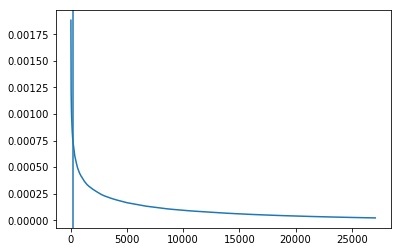

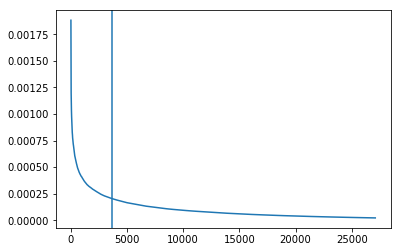

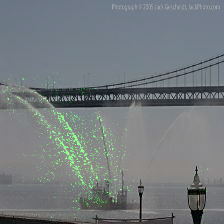

In [9]:
# Clipping
print('Clipping')
print('The two graphs below show the top and bottom clipping on the attribution distribution curve.')

# show_pil_image(pil_image(Visualize(
#     attributions, img,
#     clip_above_percentile=95,
#     clip_below_percentile=58,
#     overlay=True,
#     plot_distribution=True)))

pil_image(Visualize(
    attributions, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    overlay=True,
    plot_distribution=True))

### path_type = 1

Clipping
The two graphs below show the top and bottom clipping on the attribution distribution curve.


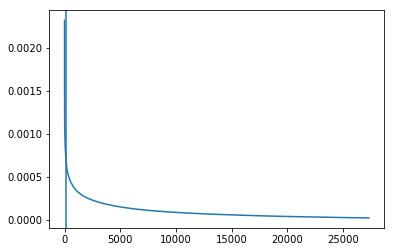

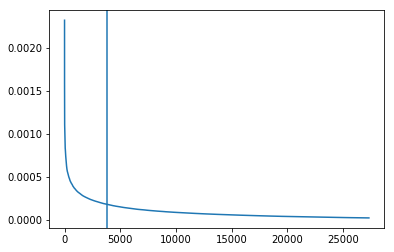

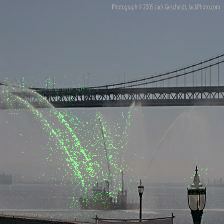

In [14]:
# Clipping
print('Clipping')
print('The two graphs below show the top and bottom clipping on the attribution distribution curve.')

# show_pil_image(pil_image(Visualize(
#     attributions, img,
#     clip_above_percentile=95,
#     clip_below_percentile=58,
#     overlay=True,
#     plot_distribution=True)))

pil_image(Visualize(
    attributions_2, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    overlay=True,
    plot_distribution=True))

### path_type = 0

Clipping + Morphological cleanup


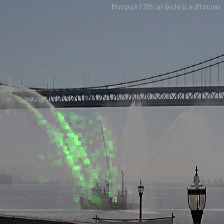

In [10]:
# Morphological cleanup
print('Clipping + Morphological cleanup')

# show_pil_image(pil_image(Visualize(
#     attributions, img,
#     clip_above_percentile=95,
#     clip_below_percentile=58,
#     morphological_cleanup=True,
#     overlay=True)))
pil_image(Visualize(
    attributions, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    morphological_cleanup=True,
    overlay=True))

### path_type = 1

Clipping + Morphological cleanup


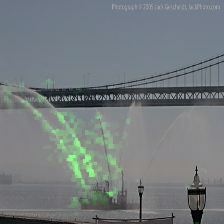

In [15]:
# Morphological cleanup
print('Clipping + Morphological cleanup')

# show_pil_image(pil_image(Visualize(
#     attributions, img,
#     clip_above_percentile=95,
#     clip_below_percentile=58,
#     morphological_cleanup=True,
#     overlay=True)))
pil_image(Visualize(
    attributions_2, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    morphological_cleanup=True,
    overlay=True))

### path_type = 0

Outlines


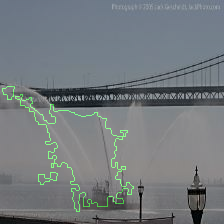

In [12]:
# Outlines
print('Outlines')

# show_pil_image(pil_image(Visualize(
#     attributions, img,
#     clip_above_percentile=95,
#     clip_below_percentile=58,
#     morphological_cleanup=True,
#     outlines=True,
#     overlay=True)))
pil_image(Visualize(
    attributions, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    morphological_cleanup=True,
    outlines=True,
    overlay=True))

### path_type = 1

Outlines


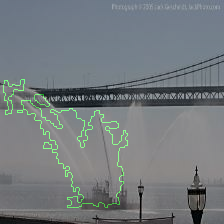

In [16]:
# Outlines
print('Outlines')

# show_pil_image(pil_image(Visualize(
#     attributions, img,
#     clip_above_percentile=95,
#     clip_below_percentile=58,
#     morphological_cleanup=True,
#     outlines=True,
#     overlay=True)))
pil_image(Visualize(
    attributions_2, img,
    clip_above_percentile=95,
    clip_below_percentile=58,
    morphological_cleanup=True,
    outlines=True,
    overlay=True))

Top label: baboon, score: 0.989468


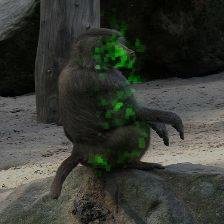

Top label: cabbage butterfly, score: 0.993752


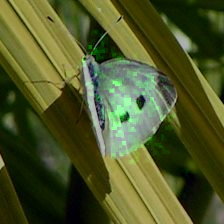

In [27]:
from IPython.display import display
# Show outlines for a few example images.
image_paths = [
    "./Images/023d8b91c64faf4b.jpg",
    "./Images/1bd6987fa9219dec.jpg",
    "./Images/1e626579f6ad7b2b.jpg",
    "./Images/1eb9afc2b4e01ecd.jpg",
    "./Images/407378360d17f0e6.jpg",
    "./Images/518a1c0660c5e32e.jpg",
    "./Images/6717aba6a10b230f.jpg",
    "./Images/70bfca4555cca92e.jpg",
    "./Images/73db3c274688a2e0.jpg",
    "./Images/87fa4cf351b87562.jpg",
    "./Images/8e570672510267d3.jpg",
    "./Images/b19f875f181025d3.jpg",
]

for image_path in image_paths[:2]:
    

    # Load image.
    img = load_image(image_path)
    
    # Compute the top label and score.
    top_label_id, score = top_label_id_and_score(img, inception_predictions_and_gradients)
    print("Top label: %s, score: %f" % (labels[top_label_id], score))
    
    # Compute the random baseline integrated gradients.
    attributions = random_baseline_integrated_gradients(
        img,
        top_label_id,
        inception_predictions_and_gradients,
        steps=50,
        num_random_trials=10)
    
    # show_pil_image(pil_image(Visualize(
    #       attributions, img,
    #       clip_above_percentile=95,
    #       clip_below_percentile=58,
    #       morphological_cleanup=True,
    #       outlines=True,
    #       overlay=True)))
    
    display(pil_image(Visualize(
          attributions, img,
          clip_above_percentile=95,
          clip_below_percentile=58,
          morphological_cleanup=True,
          # outlines=True,
          overlay=True)))